# Idea: Finding the busiest hour of WhatsApp group.

PLAN
1. Import the file
2. Get the data
3. Find a list of time and dates
4. Strip it to only time is available
5. Get the hour
6. Convert it to 24 hours format
7. Plot a frequency graph of time based in hours

Examples of time stamps
    
    9:40 PM = 21
    
    11:09 PM = 23

    9:40 AM = 9
    
    11:09 AM = 11

In [9]:
#importing regex for searching dates
import re

#importing counter for counting hour frequency
from collections import Counter
import collections

#To plot the graphs
import matplotlib.pyplot as plt

In [10]:
#opening the file and making a list out of them 
listed_messages  = list(open('Data.txt',encoding = 'utf-8'))

In [11]:
# Function to extract timestamps from messages, when supplied with a list containing all the messages
def list_of_times(list1):
    time_list = []
    for i in list1:
        time_list = time_list + re.findall(r'\d:\d\d AM|\d\d:\d\d AM | \d:\d\d PM|\d\d:\d\d PM',i)
    return time_list


In [12]:
#function to convert the time to 24 hour format and returning only hours(takng out minutes)
#formats of time are
    #12:09 AM
    #2:09 AM
    #12:09 PM
    #2:09 PM
def whole_number_hours(time_list):
    hours_24 = []
    for i in time_list:
        if "AM" in i:
            if len(i) == 7:#why equals to 7? it beasuse length of 9:00 AM is 7 and of 12:00 AM is not 7.
                hours_24.append(int(i[0]))
            #accounting for 12.30AM to append 0
            elif len(i) != 7 and int(i[:2]) == 12:
                hours_24.append(int(i[:2])-12)
                   
            else:
                hours_24.append(int(i[:2]))
                
        if "PM" in i:
            if len(i) == 7:
                hours_24.append(int(i[0]) + 12)
            elif len(i) != 7 and int(i[:2]) == 12:
                hours_24.append(int(i[:2]))
            else:
                hours_24.append(int(i[:2]) + 12)
    return hours_24

In [13]:
#list of timestamps in AM/PM format
time_list = list_of_times(listed_messages)
whole_hours = whole_number_hours(time_list)

In [14]:
# making an ordered dictionary out of that generated data
dictionary_2 = Counter(whole_hours)
dictionary = dict(Counter(whole_hours))
od = collections.OrderedDict(sorted(dictionary.items()))
od

OrderedDict([(0, 2039),
             (1, 340),
             (2, 40),
             (4, 1),
             (5, 1),
             (6, 3),
             (7, 53),
             (8, 191),
             (9, 558),
             (10, 1662),
             (11, 2379),
             (12, 2669),
             (13, 1295),
             (14, 2337),
             (15, 2586),
             (16, 665),
             (17, 688),
             (18, 938),
             (19, 1690),
             (20, 1256),
             (21, 1292),
             (22, 1537),
             (23, 3245)])

<function matplotlib.pyplot.show(close=None, block=None)>

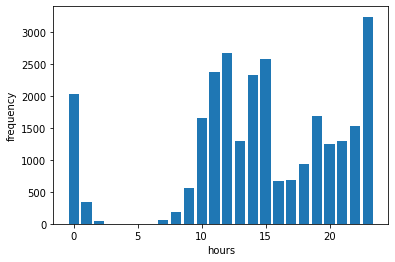

In [8]:
hours = list(dictionary.keys())
frequency = list(dictionary.values())

#plotting the graphs using matplotlib
plt.bar(hours,frequency)
plt.ylabel('frequency')
plt.xlabel('hours')
plt.show